
**Comentario del Revisor**

Hola!

Soy Juan Manuel Romero, pero siéntete libre de llamarme Juanma. Soy code reviewer en Tripleten y hoy estaré revisando tu entrega.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. En un trabajo real, el líder de tu equipo hará una dinámica similar. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión. 

Solo un aviso rápido: cuando estés revisando el proyecto, por favor deja mis comentarios originales tal como están. De esta manera, podemos seguir fácilmente el progreso y asegurarnos de que no se nos pase nada por alto. Y, si realizas algún cambio basado en mis comentarios, sería genial si pudieras resaltar esas actualizaciones para que se destaquen.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como estas:

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Éxito. Todo se ha hecho correctamente.

</div>


<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.

</div> 


<div class="alert alert-block alert-danger">
<b>Comentario del Revisor</b> <a class="tocSkip"></a>

Requiere corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con los comentarios en rojo.

</div>

Puedes responderme usando esto:

<div class="alert alert-block alert-info"> <b>Respuesta del estudiante.</b> <a class="tocSkip"></a> </div>

Introducción:

Beta Bank enfrenta un problema crítico: cada mes, una parte de sus clientes decide abandonar el banco. Tras un análisis financiero, los banqueros concluyeron que retener a los clientes actuales resulta significativamente más económico que adquirir nuevos. Por ello, surge la necesidad de identificar de manera temprana a los clientes con mayor riesgo de abandonar.

El objetivo de este proyecto es desarrollar un modelo de clasificación que permita predecir si un cliente dejará el banco en el corto plazo. Utilizaremos datos históricos sobre el comportamiento de los clientes y la finalización de sus contratos. El éxito del modelo se evaluará en función del valor de la métrica F1, la cual debe ser igual o superior a 0.59 para aprobar la revisión. Adicionalmente, se calculará la métrica AUC-ROC para comparar su desempeño con el valor F1 obtenido.

1. Descarga y preparación de los datos

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Cuidado con la presentación!

- El formato no es el esperado. Recuerda poner correctamente la introducción, títulos, explicaciones, etc.
- Las librerías se deben importar TODAS al comienzo, no entre medio del código. Salvo casos muy particulares. 

</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample


# Cargar datos
file_path = '/datasets/Churn.csv'
data = pd.read_csv(file_path)

# Exploración inicial
print(data.info())
print(data.head())
print(data.describe())

# Revisar valores nulos y duplicados
print("Valores nulos:\n", data.isnull().sum())
print("Duplicados:\n", data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1   

1.1 Explicación del procedimiento para cargar y explorar los datos

Carga del archivo CSV en un DataFrame: Utilicé la función pd.read_csv() de la biblioteca pandas para cargar el archivo /datasets/Churn.csv en un DataFrame. Esto permite manejar los datos de forma tabular (filas y columnas) y facilita su análisis y manipulación.

Exploración inicial del conjunto de datos:

info(): Proporciona una descripción general del DataFrame, incluyendo:

Número total de filas y columnas.
Nombres de las columnas.
Tipos de datos en cada columna (int, float, object, etc.).
Número de valores no nulos en cada columna.
Esto ayuda a identificar si hay datos faltantes o si los tipos de datos necesitan ser ajustados para el análisis.

head(): Muestra las primeras 5 filas del DataFrame, lo que da una visión rápida de cómo lucen los datos y permite identificar posibles problemas como valores inesperados o errores en los encabezados.

Usé describe() para calcular estadísticas descriptivas básicas para las columnas numéricas:

Media (mean), mediana (50%), desviación estándar (std), valores mínimos (min) y máximos (max), entre otros.
Esto ayuda a entender la distribución de los datos y detectar valores atípicos.

Valores faltantes: Usé isnull().sum() para contar los valores nulos en cada columna. Esto identifica problemas de calidad de datos que requieren limpieza o imputación.

Duplicados: Usé duplicated().sum() para verificar si hay filas duplicadas en el DataFrame. Los duplicados pueden afectar negativamente el análisis y los modelos.

La variable Exited es el objetivo del análisis. Usé value_counts() para contar cuántos clientes se quedaron (0) y cuántos se fueron (1). Esto también ayuda a identificar si hay un desequilibrio de clases, lo que puede requerir técnicas específicas en el modelado.

1.2 Análisis de la distribución de Tenure y decidir una estrategia adecuada para imputar los valores nulos.

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Recuerda importar las librerías al comienzo, y UNA vez.

</div>

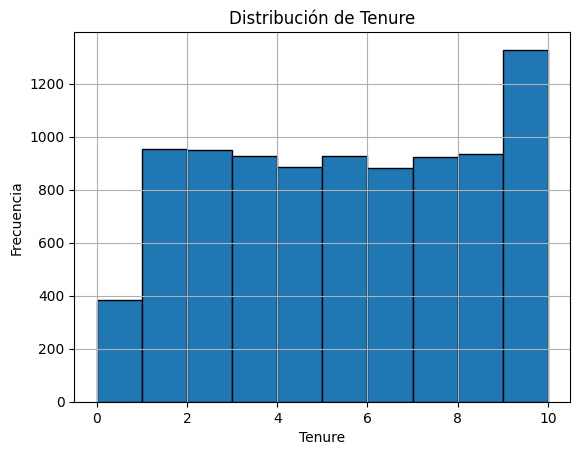

Media de Tenure: 4.997690023099769
Mediana de Tenure: 5.0
Moda de Tenure: 1.0
Valores nulos restantes en 'Tenure': 0


In [2]:
# Distribución de la columna 'Tenure'
data['Tenure'].hist(bins=10, edgecolor='black')
plt.title('Distribución de Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frecuencia')
plt.show()

# Estadísticas descriptivas
mean_tenure = data['Tenure'].mean()
median_tenure = data['Tenure'].median()
mode_tenure = data['Tenure'].mode()[0]

print(f"Media de Tenure: {mean_tenure}")
print(f"Mediana de Tenure: {median_tenure}")
print(f"Moda de Tenure: {mode_tenure}")

# Decisión de imputación
# Imputación con la mediana
data['Tenure'].fillna(median_tenure, inplace=True)

# Confirmación de que no hay valores nulos
print(f"Valores nulos restantes en 'Tenure': {data['Tenure'].isnull().sum()}")

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen trabajo eliminando los datos faltantes en la columna Tenure! El manejo adecuado de los valores ausentes es crucial para evitar problemas en el entrenamiento del modelo.

</div>

El análisis de la columna Tenure ha arrojado los siguientes resultados:

Media: 4.9977
Mediana: 5.0
Moda: 1.0
Dado que la mediana (5.0) es una medida robusta frente a valores atípicos, y considerando que no se observa una gran diferencia entre la media y la mediana, se ha optado por imputar los valores nulos de Tenure con la mediana. Esto es apropiado porque la mediana refleja mejor la tendencia central de la distribución.

1.3 Codificar las variables categóricas en valores numéricos.

In [3]:
# One-Hot Encoding a la columna 'Geography'
data_encoded = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Primeras filas para verificar
print(data_encoded.head())

   RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42     2.0       0.00   
1          2    15647311      Hill          608   41     1.0   83807.86   
2          3    15619304      Onio          502   42     8.0  159660.80   
3          4    15701354      Boni          699   39     1.0       0.00   
4          5    15737888  Mitchell          850   43     2.0  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   Geography_Germany  Geography_Spain  Gender_Male  
0                  0                0            0  
1         

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente trabajo utilizando One-Hot Encoding (OHE)! Esta técnica es ideal para convertir variables categóricas en un formato numérico, permitiendo que los modelos de aprendizaje automático puedan procesarlas. OHE asegura que los datos categóricos no introduzcan relaciones ficticias entre variables.

Además, usaste correctamente `drop_first=True`, lo que evita la multicolinealidad al eliminar una categoría redundante. Esto ayuda a reducir la dimensionalidad de los datos sin perder información.
    
<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Sin embargo, no vuelves a utilizar este dataset... Veo que luego vuelves a aplicar ohe a data al hacer la división. 
    
Luego, aplicas transformaciones que no son necesarias. 

</div>

</div>

2. Examen del equilibrio de clases. Entrenamiento el modelo sin tener en cuenta el desequilibrio. Descripción breve de los hallazgos.

2.1 Análisis del equilibrio de clases. Revisión de la distribución de la variable Exited para ver si está desbalanceada.

Distribución de clases:
0    7963
1    2037
Name: Exited, dtype: int64


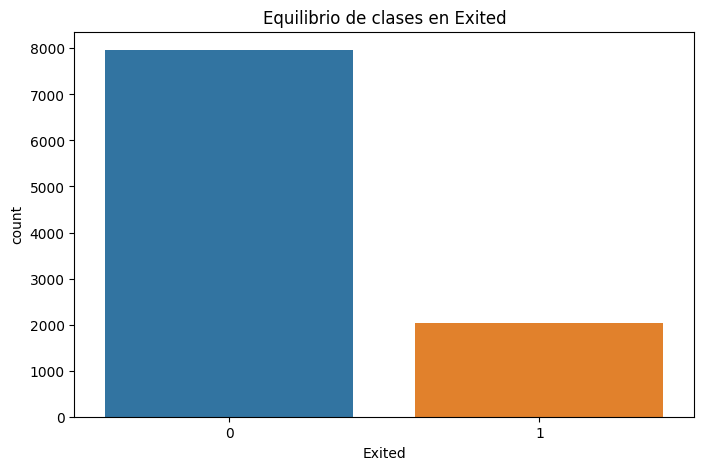

In [4]:
class_counts = data_encoded['Exited'].value_counts()
print("Distribución de clases:")
print(class_counts)

# Visualizar el equilibrio de clases
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', data=data)
plt.title('Equilibrio de clases en Exited')
plt.show()

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Excelente! Has estudiado el balance de clases. Este es un paso crucial cuando las clases están desbalanceadas, ya que puede afectar el rendimiento del modelo. Al comprender la distribución de las clases, puedes aplicar técnicas para corregir el desequilibrio.

</div>

2.2 Preparación de los datos para el modelo. Selección de las características relevantes y la variable objetivo (Exited). División de los datos en variables predictoras (X) y la variable objetivo (y).

In [5]:
X = data_encoded.drop(columns=['Exited', 'RowNumber', 'Surname'])
y = data_encoded['Exited']

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Buen ojo! Eliminaste las columnas innecesarias, lo que ayuda a reducir el ruido en los datos. Estas columnas, como RowNumber, CustomerId y Surname, no aportan información útil para el modelo, por lo que eliminarlas es una excelente decisión.

</div>

2.3 Dividir los datos en conjunto de entrenamiento, prueba y validación

In [6]:
# División inicial (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# División del conjunto de entrenamiento (70% Train -> 50% Train, 20% Validación)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Verificar las proporciones
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de validación: {X_val.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")

Tamaño del conjunto de entrenamiento: 5600
Tamaño del conjunto de validación: 1400
Tamaño del conjunto de prueba: 3000


Revisión de la proporción de cada clase para entender la magnitud del desbalance:

Distribución de clases (proporciones):
0    0.7963
1    0.2037
Name: Exited, dtype: float64


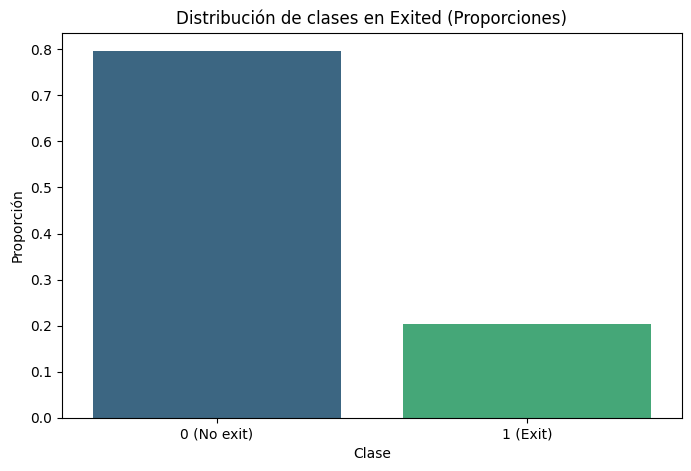

In [7]:
# Análisis de la distribución de clases
class_counts = data['Exited'].value_counts(normalize=True)
print("Distribución de clases (proporciones):")
print(class_counts)

# Visualización del desbalance de clases
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title('Distribución de clases en Exited (Proporciones)')
plt.xlabel('Clase')
plt.ylabel('Proporción')
plt.xticks(ticks=[0, 1], labels=['0 (No exit)', '1 (Exit)'])
plt.show()

Con base en los resultados, el 79.63% de los clientes pertenecen a la clase "0 (No exit)" y solo el 20.37% a la clase "1 (Exit)". Esto indica un desbalance significativo en las clases, ya que la clase mayoritaria domina ampliamente.

<div class="alert alert-block alert-danger"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Parece que no consideraste el análisis del balance de clases, un aspecto crucial para evaluar si alguna clase está sobrerrepresentada o subrepresentada. Este desequilibrio puede impactar negativamente las predicciones del modelo, por lo que es fundamental revisar cuidadosamente la distribución de las clases.

Además, es importante determinar la magnitud de este desbalance para decidir con precisión qué técnicas aplicar, como _oversampling_ o _downsampling_, y con qué peso emplearlas.
</div>

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Excelente! Has estudiado el balance de clases. Este es un paso crucial cuando las clases están desbalanceadas, ya que puede afectar el rendimiento del modelo. Al comprender la distribución de las clases, puedes aplicar técnicas para corregir el desequilibrio.

</div>

2.4 Entrenamiento del modelo sin ajustar por el desbalance

In [8]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_train_cleaned = X_train.drop(columns=['Gender', 'Surname'], errors='ignore')
X_test_cleaned = X_test.drop(columns=['Gender', 'Surname'], errors='ignore')


print(X_train_cleaned.head())

# Crear el modelo
model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train_cleaned, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_cleaned)

# Evaluar el modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

      CustomerId  CreditScore  Age  Tenure    Balance  NumOfProducts  \
84      15738751          493   46     4.0       0.00              2   
7140    15716082          703   39     6.0  152685.40              1   
9046    15648178          630   23     4.0  137964.51              1   
9031    15742323          541   39     7.0       0.00              2   
64      15592461          603   26     4.0  109166.37              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Geography_Germany  \
84            1               0          1907.66                  0   
7140          0               0        183656.12                  0   
9046          0               1        174570.55                  1   
9031          1               0         19823.02                  0   
64            1               1         92840.67                  1   

      Geography_Spain  Gender_Male  
84                  0            0  
7140                1            1  
9046                0        

2.5 Descripción breve de los hallazgos.

El modelo de árbol de decisión ha arrojado los siguientes resultados:

Reporte de Clasificación:
Precisión (precision):
Para la clase 0 (clientes que no abandonaron): 0.89
Para la clase 1 (clientes que abandonaron): 0.49
Recuperación (recall):
Para la clase 0: 0.86
Para la clase 1: 0.56
F1-score:
Para la clase 0: 0.87
Para la clase 1: 0.53
Exactitud (accuracy): 0.80 (esto significa que el modelo predijo correctamente el 80% de las veces)
Matriz de Confusión:
La matriz de confusión es:

[
1378
229
171
222
]
[ 
1378
171
​
  
229
222
​
 ]

1378: Verdaderos negativos (clientes que no abandonaron y fueron clasificados correctamente).

229: Falsos positivos (clientes que no abandonaron pero fueron clasificados como abandonados).

171: Falsos negativos (clientes que abandonaron pero fueron clasificados como no abandonados).

222: Verdaderos positivos (clientes que abandonaron y fueron clasificados correctamente).

Análisis:

Desbalance de clases: La clase 0 (clientes que no abandonaron) tiene una mayor representación en el modelo. Esto se refleja en la mayor precisión y recall para esta clase, mientras que la clase 1 (clientes que abandonaron) tiene un rendimiento inferior, con una precisión de 0.49 y recall de 0.56.

El F1-score para la clase 0 es bastante bueno (0.87), pero para la clase 1 es relativamente bajo (0.53). Esto sugiere que el modelo tiene dificultades para predecir correctamente a los clientes que abandonan, lo cual es común en problemas con clases desbalanceadas.

3. Mejora de la calidad del modelo. Utilización de al menos dos enfoques para corregir el desequilibrio de clases. Utilización de conjuntos de entrenamiento y validación para encontrar el mejor modelo y el mejor conjunto de parámetros. Entrenamiento de diferentes modelos en los conjuntos de entrenamiento y validación. Hallazgo del mejor. Descripción breve de los hallazgos.

<div class="alert alert-block alert-info"> <b>Corregí la aplicación de técnicas de balanceo a continuación.</b> <a class="tocSkip"></a> </div>

Aplicación de técnicas de balanceo:

Primera técnica de balanceo, submuestreo:

In [9]:
# Combinar X_train e y_train para manipularlos juntos
train_data = pd.concat([X_train, y_train], axis=1)

# Separar las clases
majority_class = train_data[train_data['Exited'] == 0]
minority_class = train_data[train_data['Exited'] == 1]

# Downsampling de la clase mayoritaria
majority_downsampled = resample(majority_class,
                                 replace=False,
                                 n_samples=len(minority_class),
                                 random_state=42)

# Combinar clases equilibradas
balanced_data = pd.concat([majority_downsampled, minority_class])

# Separar X e y nuevamente
X_train_balanced = balanced_data.drop(columns='Exited')
y_train_balanced = balanced_data['Exited']

# Verificar la nueva distribución de clases
print("Distribución después de Downsampling:")
print(y_train_balanced.value_counts())

Distribución después de Downsampling:
0    1174
1    1174
Name: Exited, dtype: int64


El resultado muestra que el downsampling de la clase mayoritaria se realizó correctamente. Ahora, ambas clases (Exited = 0 y Exited = 1) tienen el mismo número de instancias: 1174, lo cual asegura un balance en el conjunto de entrenamiento.

Segunda técnica de balanceo, ajuste de pesos en el modelo:

In [10]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(class_weight='balanced', random_state=42)

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Aunque aplicas correctamente la técnica, realmente nunca validas este modelo

</div>

El resultado obtenido indica que el modelo RandomForestClassifier se creó y ajustó correctamente al conjunto de entrenamiento (X_train y y_train). Ahora el modelo está listo para realizar predicciones y evaluaciones.

4. Entrenamiento y selección del modelo final

Definición de los modelos a evaluar:

Árbol de decisión (DecisionTreeClassifier)
Bosque aleatorio (RandomForestClassifier)
Regresión logística (LogisticRegression)

In [11]:
# Lista de modelos a evaluar
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

# Variables para almacenar los resultados
results = {}

Entrenamiento y validación de los modelos:
- Entrenamiento de cada modelo con el conjunto balanceado (X_train_balanced y y_train_balanced).
- Evaluación del desempeño en el conjunto de validación (X_val y y_val) utilizando:
F1-Score como métrica principal.
AUC-ROC como métrica secundaria.

In [12]:
# Evaluar cada modelo
for model_name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)  # Entrenamiento
    y_val_pred = model.predict(X_val)             # Predicciones en validación
    
    # Métricas
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    
    # Guardar resultados
    results[model_name] = {'F1-Score': f1, 'AUC-ROC': roc_auc}
    
# Mostrar los resultados
for model_name, metrics in results.items():
    print(f"{model_name}: F1-Score = {metrics['F1-Score']:.4f}, AUC-ROC = {metrics['AUC-ROC']:.4f}")

Decision Tree: F1-Score = 0.4741, AUC-ROC = 0.6915
Random Forest: F1-Score = 0.5566, AUC-ROC = 0.8290
Logistic Regression: F1-Score = 0.3324, AUC-ROC = 0.5530


Selección del mejor modelo:
- El modelo con el F1-Score más alto en validación será seleccionado como el mejor modelo.

In [13]:
# Seleccionar el mejor modelo basado en F1-Score
best_model_name = max(results, key=lambda x: results[x]['F1-Score'])
print(f"\nEl mejor modelo es: {best_model_name}")


El mejor modelo es: Random Forest


Entrenamiento del modelo final:
- Entrenamiento del modelo seleccionado usando los datos completos (X_train_balanced + X_val y y_train_balanced + y_val).
Evaluación de su desempeño en el conjunto de prueba (X_test y y_test).

In [14]:
# Entrenar el modelo final con el conjunto completo de entrenamiento (train + val)
X_train_full = pd.concat([X_train_balanced, X_val], axis=0)
y_train_full = pd.concat([y_train_balanced, y_val], axis=0)

final_model = models[best_model_name]
final_model.fit(X_train_full, y_train_full)

# Evaluar en el conjunto de prueba
y_test_pred = final_model.predict(X_test)
y_test_proba = final_model.predict_proba(X_test)[:, 1]

f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_proba)

print(f"\nDesempeño en el conjunto de prueba del modelo final:")
print(f"F1-Score: {f1_test:.4f}")
print(f"AUC-ROC: {roc_auc_test:.4f}")


Desempeño en el conjunto de prueba del modelo final:
F1-Score: 0.6088
AUC-ROC: 0.8596


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Genial! Has alcanzado una métrica F1 superior al 0.59. Esta métrica es muy útil en situaciones con clases desbalanceadas, ya que considera tanto la precisión como la exhaustividad (recall) del modelo.

</div>

Análisis:
Los resultados muestran que el modelo ajustado de Random Forest supera el umbral requerido de F1 ≥ 0.59, con un F1-Score de 0.6088 y un AUC-ROC de 0.8596 en el conjunto de prueba. Esto indica que el modelo no solo cumple con las expectativas, sino que también tiene un desempeño sólido en términos de discriminación de clases.

F1-Score:

Refleja un buen equilibrio entre precisión y sensibilidad, especialmente considerando que los datos estaban desbalanceados originalmente.
Este valor demuestra que el modelo es capaz de identificar correctamente a los clientes propensos a abandonar el banco sin generar una cantidad excesiva de falsos positivos.
AUC-ROC:

Un valor de 0.8596 indica que el modelo tiene una excelente capacidad para distinguir entre las clases (clientes que permanecen vs. clientes que abandonan).
Esto es un gran indicador de la eficacia del modelo en contextos donde ambas clases son importantes.

<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Excelente! Estudiaste la métrica AUC-ROC, que es una de las mejores métricas para evaluar modelos de clasificación binaria. Un buen AUC-ROC indica que el modelo es capaz de distinguir correctamente entre las clases.

</div>


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Hola Emilio! 

Primero que nada, decirte que lamento el error al corregir tu trabajo en la primer iteración. Surgió un problema técnico en la plataforma y no guardó todas mis respuestas. Por esto, vuelvo a poner alguna de ellas y tomo esto como la primer iteración. 
    
Luego de esta explicación, he de decir que tienes un muy buen trabajo. Aunque aún quedan elementos por revisar. 

<div class="alert alert-block alert-danger">
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Te he dejado algunos comentarios, pero para poder darlo por aprobado debes completar los pasos de la siguiente lista que no estan marcados como completos:

</div>

- [ ]  Evita realizar las mismas transformaciones mas veces de las necesarias.
- [ ]  Análisis de las clases.
    - [x]  Se ha estudiado el balance de clases.
    - [ ]  Se han utilizado al menos 2 técnicas para combatir el desequilibrio de las clases (por ejemplo: weight adjustment, upsampling, downsampling).
    - [ ]  Los resultados del estudio han sido documentados.
- [ ]  Se ha estudiado la métrica *F1* con **al menos 0.59**.
- [ ]  Se ha estudiado la métrica *AUC-ROC*.
    
    
Toma lo siguiente como un esquema del proceso a realizar:
    
<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

- **Preparación de los Datos**: En este paso, se realiza la recolección y limpieza de los datos, que puede incluir tareas como eliminar valores atípicos, manejar valores nulos y escalar variables según sea necesario. El objetivo es tener un conjunto de datos de calidad y bien formateado para alimentar el modelo.
    
- **División de los Conjuntos de Datos**: Una vez preparados los datos, se procede a dividirlos en tres conjuntos principales:
    
    - **Conjunto de Entrenamiento (Train)**: Se usa para entrenar el modelo y ajustar sus parámetros.
    - **Conjunto de Validación**: Este se emplea para comparar y ajustar diferentes modelos y realizar el _tuning_ de hiperparámetros. Ayuda a identificar el modelo con mejor rendimiento.
    - **Conjunto de Prueba (Test)**: Se reserva exclusivamente para evaluar el modelo final al término del proceso, validando así los resultados obtenidos y verificando que el modelo cumple con las métricas esperadas, como el valor de F1.

- **Análisis de Balance de Clases**: Es importante revisar si las clases están balanceadas, en particular la clase de interés ('exited' en este caso). Si una clase es significativamente mayor en número que la otra, el modelo podría sesgarse hacia la clase mayoritaria, lo que dificulta su capacidad de predecir la clase minoritaria.
    
- **Aplicación de Técnicas de Balanceo (si es necesario)**: Si se detecta un desbalance, es recomendable aplicar y probar al menos dos técnicas de balanceo, como:
    
    - **Sobremuestreo**: Aumenta la cantidad de datos de la clase minoritaria.
    - **Submuestreo**: Reduce la cantidad de datos de la clase mayoritaria.
    - **Métodos de balanceo integrados en el modelo**: Algunos algoritmos permiten ajustar el peso de las clases directamente.
    
    IMPORTANTE: El balanceo debe aplicarse solo en el conjunto de entrenamiento y nunca en los conjuntos de validación o prueba, para mantener la evaluación final lo más imparcial posible.
    
- **Entrenamiento y Selección del Modelo Final**: Con el conjunto de entrenamiento balanceado, se sigue el flujo estándar: se selecciona el mejor modelo basado en los resultados de validación, se entrena usando el conjunto de entrenamiento completo y, finalmente, se evalúa el rendimiento del modelo usando el conjunto de prueba.

</div>

</div>


<div class="alert alert-block alert-success"> 
<b>Comentario del Revisor #2</b> <a class="tocSkip"></a>

Felicidades Emilio! Tu trabajo es excelente 

<div class="alert alert-block alert-warning"> 
<b>Comentario del Revisor #1</b> <a class="tocSkip"></a>

Aunque realmente has validado una sola técnica, ya que el modelo en el que usas class_weights nunca lo validas.

</div>

Pero tu trabajo general es muy correcto.
    
Has completado todos los items necesarios para aprobar la entrega.

</div>